In [10]:
%matplotlib inline
import pandas as pd
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib
matplotlib.rcParams['figure.figsize'] = (11.0, 7.0)
import matplotlib.pyplot as plt
import re
import numpy as np
from  matplotlib.ticker import FuncFormatter
import glob
import os

In [11]:
dfs = []
for path in glob.glob('results/*.log'):
    fn = os.path.basename(path)
    parts = fn.split(".")
    size = int(parts[1])
    omap_max_size = parts[2]
    tmp = pd.read_csv(path, names=('iops',))
    tmp["size"] = size
    tmp["omap_max_size"] = omap_max_size
    dfs.append(tmp)
df = pd.concat(dfs)
#df[df["size"] > 32000]

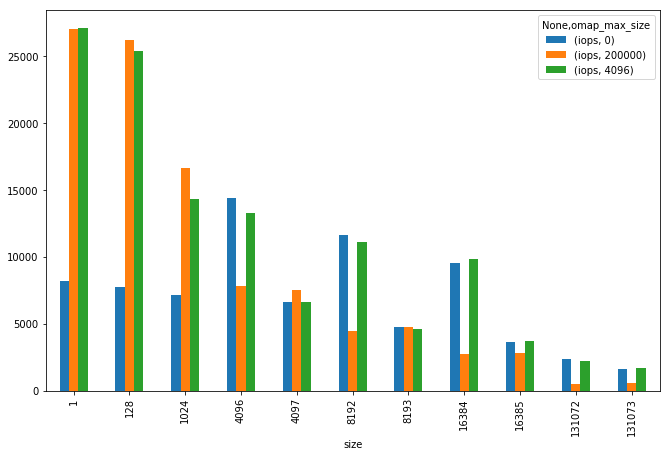

In [12]:
df.groupby(['size', 'omap_max_size']).mean().unstack(-1).plot.bar(legend=True)